In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from common import *


In [7]:
validationData = pd.read_excel(r'tranco_top-100k_com-validation_entry-sheet.xlsx')\
    .fillna({'consentNoticePresent':0})\
    .astype({'consentNoticePresent':'bool'})


NameError: name 'rank_group_bins' is not defined

In [4]:
validationData.comStatus.value_counts()

not detected    36
handled         20
Name: comStatus, dtype: int64

In [5]:
validationData.comValidation.value_counts()

correct                    12
impossible                  4
log but no interaction      2
validation not possible     1
wrong interaction           1
Name: comValidation, dtype: int64

In [6]:
validationData.consentNoticeType.value_counts()

accept options           19
reject accept options    17
only accept              15
notify only               5
Name: consentNoticeType, dtype: int64

In [13]:
validationData['comHandled'] = False
validationData.loc[validationData.comStatus == 'handled','comHandled'] = True

validationData['status'] = 'Not Reached'
validationData.loc[validationData.reached,'status'] = 'No Consent Notice'
validationData.loc[validationData.consentNoticePresent,'status'] = 'No Relevant Consent Notice'
validationData.loc[validationData.consentNoticePresent & validationData.consentNoticeType.isin(['accept options','reject accept options']),'status'] = 'No Compatible Consent Notice'
validationData.loc[validationData.comHandled,'status'] = 'Handled incorrectly By Consent-O-Matic'
validationData.loc[validationData.comValidation == 'correct','status'] = 'Handled correctly By Consent-O-Matic'
validationData.head(20)

pagerank                          domain  reached  \
0       3583                      matomo.org     True   
1      60499                      91p51.live    False   
2      53228              jhnewsandguide.com     True   
3      21334                       redbus.in     True   
4       3886                   pitchfork.com     True   
5      51522                     nhsa.gov.cn    False   
6      84262                       akwam.one     True   
7      10686                    riverbed.com     True   
8      59949                     analogx.com     True   
9      41033                       ctc.ad.jp    False   
10     25748               helpscoutdocs.com     True   
11     44304             barrett-jackson.com     True   
12     83814                        ivers.ru     True   
13     61992  h74gh718gh4gg98av43g98g8hg.com    False   
14     49393                    fssnet.co.in    False   
15     37117                      arista.com     True   
16     65943                    crucialx.net     True   
17      2217                  vanderbilt.edu     True   
18     81750                   czechvideo.io     True   
19     77997                      cartoq.com     True   

                         reachedUrl  consentNoticePresent consentNoticeType  \
0               https://matomo.org/                 False               NaN   
1                               NaN                 False               NaN   
2   https://www.jhnewsandguide.com/                  True       only accept   
3            https://www.redbus.in/                 False               NaN   
4            https://pitchfork.com/                  True    accept options   
5                               NaN                 False               NaN   
6                 https://akwam.to/                 False               NaN   
7       https://www.riverbed.com/de                  True    accept options   
8               http://analogx.com/                 False               NaN   
9                               NaN                 False               NaN   
10       https://helpscoutdocs.com/                 False               NaN   
11     https://barrett-jackson.com/                  True       only accept   
12                https://ivers.ru/                 False               NaN   
13                              NaN                 False               NaN   
14                              NaN                 False               NaN   
15       https://www.arista.com/en/                  True    accept options   
16             http://crucialx.net/                 False               NaN   
17      https://www.vanderbilt.edu/                  True       only accept   
18           https://czechvideo.io/                 False               NaN   
19          https://www.cartoq.com/                 False               NaN   

       comStatus            comValidation                CMP  \
0            NaN                      NaN                NaN   
1            NaN                      NaN                NaN   
2   not detected                      NaN                NaN   
3            NaN                      NaN                NaN   
4        handled                  correct  onetrust_pcpanel    
5            NaN                      NaN                NaN   
6            NaN                      NaN                NaN   
7        handled                  correct   onetrust_banner    
8            NaN                      NaN                NaN   
9            NaN                      NaN                NaN   
10           NaN                      NaN                NaN   
11  not detected                      NaN                NaN   
12           NaN                      NaN                NaN   
13           NaN                      NaN                NaN   
14           NaN                      NaN                NaN   
15       handled  validation not possible    onetrust_banner   
16           NaN                      NaN                N

<AxesSubplot:>

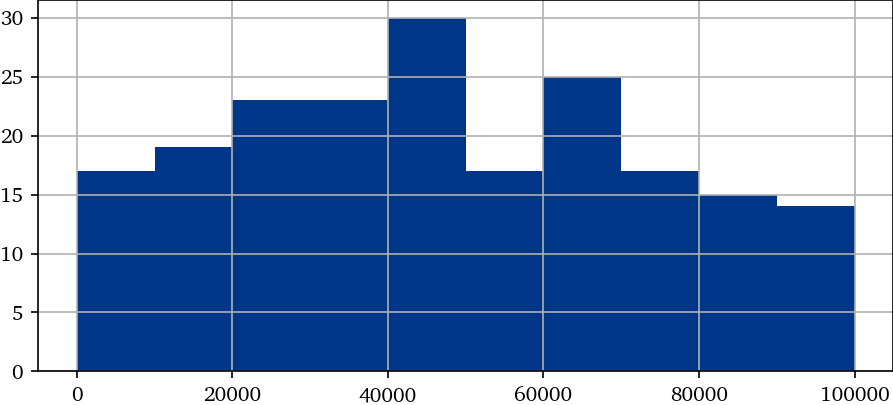

In [ ]:
validationData.pagerank.hist(bins=rank_group_bins)

<AxesSubplot:ylabel='status'>

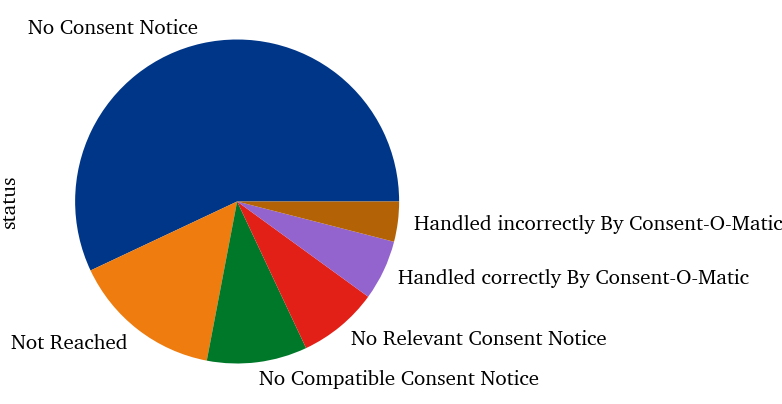

In [14]:
validationData.status.value_counts().plot(kind='pie')

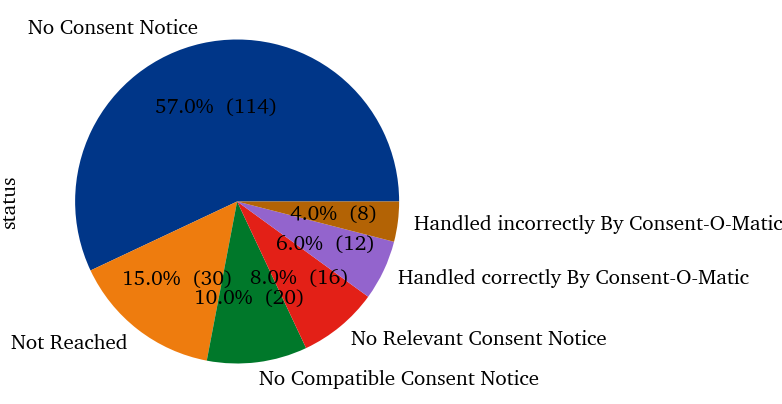

In [15]:
status_counts = validationData.status.value_counts()
fig, ax = plt.subplots()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

status_counts.plot(
    kind='pie',
    ax = ax,
    autopct=make_autopct(status_counts)
)
fig.savefig('./images/com_validation_status.pdf')
plt.show()